# Investigating Fandando Movie Ratings

In this project we wiill investigate about the inflate fandango ratings. The goal is to check if there has been any changue in Fandango's rating system after Hickey's analysis.

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on GitHub. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on GitHub and we'll use it to analyze the rating system's characteristics after Hickey's analysis.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
fandango_previous = pd.read_csv('fandango_score_comparison.csv', usecols=['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'])
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [8]:
fandango_after = pd.read_csv('movie_ratings_16_17.csv', usecols=['movie', 'year', 'fandango'])
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


Our population of interest are the movies in fandango previous with Fandango_Difference different of zero.

After analyzing the data, the second dataframe is not usefull for our goul due that to the data contained is for movies released in 2016 and 2017, and fangando data was made in 2015

## Changing our goal

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

In [18]:
fandango_previous['Year'] = fandango_previous.FILM.str.extract(r'\((\d{4})\)').astype(int)
fandango_previous['Year'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



2015    129
2014     17
Name: Year, dtype: int64

In [11]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [19]:
fandango_2015 = fandango_previous[fandango_previous.Year == 2015]
fandango_2016 = fandango_after[fandango_after.year == 2016]

([<matplotlib.axis.XTick at 0x7f50adec3940>,
 <a list of 10 Text xticklabel objects>)

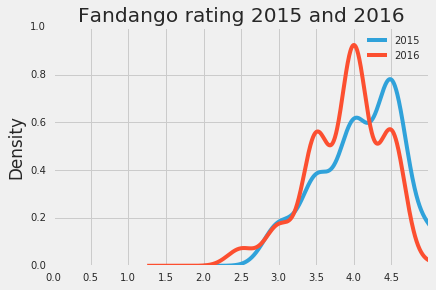

In [56]:
plt.style.use('fivethirtyeight')
fandango_2015.Fandango_Stars.plot.kde(label='2015', legend=True)
fandango_2016.fandango.plot.kde(label='2016', legend=True)
plt.title('Fandango rating 2015 and 2016')
plt.xlim(0, 5)
plt.xticks([i/10 for i in range(0, 50, 5)])

Acording to the kernel density plot, we can see that in 2015 almost all the values were in 4.5, in 2016 we can see big steps in 3.5, 4 and 4.5. We definitly can see a changue in the distribution of the rating. Let's check the frequency distribution tables.

In [57]:
fandango_2015.Fandango_Stars.value_counts(normalize=True).sort_index(ascending=False)

5.0    0.069767
4.5    0.379845
4.0    0.286822
3.5    0.178295
3.0    0.085271
Name: Fandango_Stars, dtype: float64

In [44]:
fandango_2016.fandango.value_counts(normalize=True).sort_index(ascending=False)

5.0    0.005236
4.5    0.246073
4.0    0.403141
3.5    0.240838
3.0    0.073298
2.5    0.031414
Name: fandango, dtype: float64

After analyzing the frequency tables we notice that previously in fandango the values were more spread. Let's calculate the mean, median, and mode for each distribution

In [75]:
print('2015\nmean = {} \nmedian = {} \nmode = {}'.format(fandango_2015.Fandango_Stars.mean(), fandango_2015.Fandango_Stars.median(), fandango_2015.Fandango_Stars.mode()[0]))

2015
mean = 4.0852713178294575 
median = 4.0 
mode = 4.5


In [76]:
print('2016\nmean = {} \nmedian = {} \nmode = {}'.format(fandango_2016.fandango.mean(), fandango_2016.fandango.median(), fandango_2016.fandango.mode()[0]))

2016
mean = 3.887434554973822 
median = 4.0 
mode = 4.0


## Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.